In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm, tqdm_pandas
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('bmh')

In [2]:
train = pd.read_csv("../dataset/train_feats_init.csv")

In [3]:
print("Fill null values with empty string...")
train['question1'].fillna('', inplace=True)
train['question2'].fillna('', inplace=True)

Fill null values with empty string...


# Classification

### Jaccard distance

Based on the distribution seen on previous plot, we can see that most duplicate questions have Jaccard distance higher than 0.2. If we use this as threshold, how good is our prediction model?

In [4]:
# to split into training, validation, and test set
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train['jaccard_dist'], train['is_duplicate'], test_size=0.2, random_state=1, stratify=train['is_duplicate'])

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# prediction based on jaccard distance on training set

_pred = []
for i in range(0, len(X_train)):
    if X_train.iloc[i] > 0.2:
        _pred.append(1)
    else:
        _pred.append(0)

y_pred_train = np.array(_pred)

_train_true = 0

for i in range(0, len(X_train)):
    if (y_pred_train[i] == y_train.iloc[i]):
        _train_true += 1

In [6]:
# prediction based on jaccard distance on test set

_pred = []
for i in range(0, len(X_test)):
    if X_test.iloc[i] > 0.2:
        _pred.append(1)
    else:
        _pred.append(0)

y_pred_test = np.array(_pred)

_test_true = 0

for i in range(0, len(X_test)):
    if (y_pred_test[i] == y_test.iloc[i]):
        _test_true += 1

In [7]:
print('Accuracy of Jaccard distance-based classifier on training set: {:.2f}%'.format(accuracy_score(y_train, y_pred_train) * 100))
print('F1-score of Jaccard distance-based classifier on training set: {:.2f}%'.format(f1_score(y_train, y_pred_train) * 100))

Accuracy of Jaccard distance-based classifier on training set: 66.47%
F1-score of Jaccard distance-based classifier on training set: 64.85%


In [8]:
print('Accuracy of Jaccard distance-based classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_test) * 100))
print('F1-score of Jaccard distance-based classifier on test set: {:.2f}%'.format(f1_score(y_test, y_pred_test) * 100))

Accuracy of Jaccard distance-based classifier on test set: 66.56%
F1-score of Jaccard distance-based classifier on test set: 65.00%


Using this simple "model", it seems to have decent results.

### Logistic regressions

After observing the correlation plot, we'll user 4 features as the dependent variables: 
- edit_dist_last_word
- jaccard_dist
- cosine_dist
- num_common_words

Then, we'll split the dataset into training, validation, and test set.

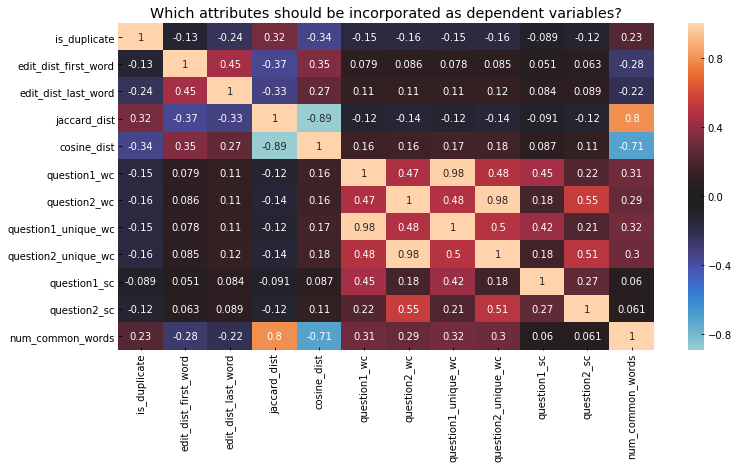

In [9]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(train[['is_duplicate','edit_dist_first_word','edit_dist_last_word',
                   'jaccard_dist','cosine_dist','question1_wc','question2_wc','question1_unique_wc','question2_unique_wc','question1_sc','question2_sc','num_common_words']].corr(),
            center=0,
            annot = True,
           ax=ax)

plt.title("Which attributes should be incorporated as dependent variables?")
plt.show()

In [10]:
# to split into training, validation, and test set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[['edit_dist_last_word','jaccard_dist','cosine_dist','num_common_words']], train['is_duplicate'], test_size=0.2, random_state=1, stratify=train['is_duplicate'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

print("Training, validation and testing split was successful.")

Training, validation and testing split was successful.


In [11]:
from sklearn.linear_model import LogisticRegression

classifier_logres = LogisticRegression(random_state=0)
classifier_logres.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_pred_train = classifier_logres.predict(X_train)

from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[133007  30210]
 [ 54326  41202]]


In [13]:
y_pred_val = classifier_logres.predict(X_val)

from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix)

[[33224  7581]
 [13794 10088]]


In [14]:
y_pred_test = classifier_logres.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[41467  9538]
 [16951 12902]]


In [15]:
print('Accuracy of logistic regression classifier on training set: {:.2f}%'.format(accuracy_score(y_train, y_pred_train) * 100))
print('F1-score of logistic regression classifier on training set: {:.2f}%'.format(f1_score(y_train, y_pred_train) * 100))

Accuracy of logistic regression classifier on training set: 67.33%
F1-score of logistic regression classifier on training set: 49.36%


In [16]:
print('Accuracy of logistic regression classifier on validation set: {:.2f}%'.format(accuracy_score(y_val, y_pred_val) * 100))
print('F1-score of logistic regression classifier on validation set: {:.2f}%'.format(f1_score(y_val, y_pred_val) * 100))

Accuracy of logistic regression classifier on validation set: 66.96%
F1-score of logistic regression classifier on validation set: 48.56%


In [17]:
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_test) * 100))
print('F1-score of logistic regression classifier on test set: {:.2f}%'.format(f1_score(y_test, y_pred_test) * 100))

Accuracy of logistic regression classifier on test set: 67.24%
F1-score of logistic regression classifier on test set: 49.35%


## Deep learning

Prepare word embeddings.

In [18]:
from os.path import expanduser, exists

KERAS_DATASETS_DIR = expanduser('~/.keras/datasets/')
GLOVE_ZIP_FILE_URL = 'http://nlp.stanford.edu/data/glove.840B.300d.zip'
GLOVE_ZIP_FILE = 'glove.840B.300d.zip'
GLOVE_FILE = 'glove.840B.300d.txt'
Q1_TRAINING_DATA_FILE = 'data/preset/q1_train.npy'
Q2_TRAINING_DATA_FILE = 'data/preset/q2_train.npy'
LABEL_TRAINING_DATA_FILE = 'data/preset/label_train.npy'
WORD_EMBEDDING_MATRIX_FILE = 'data/preset/word_embedding_matrix.npy'
NB_WORDS_DATA_FILE = 'data/preset/nb_words.json'
MAX_NB_WORDS = 200000
MAX_SEQUENCE_LENGTH = 25
EMBEDDING_DIM = 300

In [19]:
import json

q1_data = np.load(Q1_TRAINING_DATA_FILE)
q2_data = np.load(Q2_TRAINING_DATA_FILE)
labels = np.load(LABEL_TRAINING_DATA_FILE)
word_embedding_matrix = np.load(WORD_EMBEDDING_MATRIX_FILE)

with open(NB_WORDS_DATA_FILE) as json_data:
    nb_words = json.load(json_data)

In [20]:
qid_dict = {}

for i,series in train.iterrows():
    if series['qid1'] not in qid_dict:
        qid_dict[series['qid1']] = series['question1']
    if series['qid2'] not in qid_dict:
        qid_dict[series['qid2']] = series['question2']

In [21]:
txt = []

for key, value in qid_dict.items():
    txt.append(str(value))

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.data_utils import get_file

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(txt)
question1_word_sequences = tokenizer.texts_to_sequences(train['question1'])
question2_word_sequences = tokenizer.texts_to_sequences(train['question2'])
word_index = tokenizer.word_index

print("Words in index: %d" % len(word_index))

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Words in index: 95596


In [23]:
if not exists(KERAS_DATASETS_DIR + GLOVE_ZIP_FILE):
    zipfile = ZipFile(get_file(GLOVE_ZIP_FILE, GLOVE_ZIP_FILE_URL))
    zipfile.extract(GLOVE_FILE, path=KERAS_DATASETS_DIR)
    
print("Processing", GLOVE_FILE)

embeddings_index = {}
with open(KERAS_DATASETS_DIR + GLOVE_FILE, encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings: %d' % len(embeddings_index))

Processing glove.840B.300d.txt
Word embeddings: 2196016


In [24]:
nb_words = min(MAX_NB_WORDS, len(word_index))
word_embedding_matrix = np.zeros((nb_words + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        word_embedding_matrix[i] = embedding_vector

print('Null word embeddings: %d' % np.sum(np.sum(word_embedding_matrix, axis=1) == 0))

Null word embeddings: 29276


## MaLSTM Model

In [25]:
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, LSTM, Merge, Add, Concatenate, Dense
import keras.backend as K
from keras.optimizers import Adadelta, Adam
from keras.callbacks import ModelCheckpoint

from time import time
import datetime

In [26]:
def f1_score(y_true, y_pred):
    """
    f1 score

    :param y_true:
    :param y_pred:
    :return:
    """
    tp_3d = K.concatenate(
        [
            K.cast(y_true, 'bool'),
            K.cast(K.round(y_pred), 'bool'),
            K.cast(K.ones_like(y_pred), 'bool')
        ], axis=1
    )

    fp_3d = K.concatenate(
        [
            K.cast(K.abs(y_true - K.ones_like(y_true)), 'bool'),
            K.cast(K.round(y_pred), 'bool'),
            K.cast(K.ones_like(y_pred), 'bool')
        ], axis=1
    )

    fn_3d = K.concatenate(
        [
            K.cast(y_true, 'bool'),
            K.cast(K.abs(K.round(y_pred) - K.ones_like(y_pred)), 'bool'),
            K.cast(K.ones_like(y_pred), 'bool')
        ], axis=1
    )

    tp = K.sum(K.cast(K.all(tp_3d, axis=1), 'int32'))
    fp = K.sum(K.cast(K.all(fp_3d, axis=1), 'int32'))
    fn = K.sum(K.cast(K.all(fn_3d, axis=1), 'int32'))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return 2 * ((precision * recall) / (precision + recall))

In [27]:
# to split into training, validation, and test set for text sequences
from sklearn.cross_validation import train_test_split

X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(q1_data, labels, test_size=0.2, random_state=1, stratify=labels)
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(q2_data, labels, test_size=0.2, random_state=1, stratify=labels)

X_train_q1, X_val_q1, y_train_q1, y_val_q1 = train_test_split(X_train_q1, y_train_q1, test_size=0.2, random_state=1, stratify=y_train_q1)
X_train_q2, X_val_q2, y_train_q2, y_val_q2 = train_test_split(X_train_q2, y_train_q2, test_size=0.2, random_state=1, stratify=y_train_q2)

print("Training, validation and testing split was successful.")

Training, validation and testing split was successful.


In [28]:
X_train = {'left': X_train_q1, 'right': X_train_q2}
X_validation = {'left': X_val_q1, 'right': X_val_q2}
X_test = {'left': X_test_q1, 'right': X_test_q2}

y_train = y_train_q1
y_validation = y_val_q1

In [29]:
assert X_train['left'].shape == X_train['right'].shape
assert len(X_train['left']) == len(y_train)

In [30]:
checkpointer = ModelCheckpoint(filepath='weights.best.model.hdf5', 
                               verbose=1, save_best_only=True)

### Model training

#### Only based on word embedding

1. Adadelta optimizer - loss = MSE

In [31]:
# build the model
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25
max_seq_length = 31

def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

encoded_left = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(left_input)

encoded_right = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_output, right_output])

# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', f1_score])

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:36: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [32]:
# Start training
training_start_time = time()

malstm_trained1 = malstm.fit([X_train['left'], X_train['right']], y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], y_validation),
                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 258745 samples, validate on 64687 samples
Epoch 1/3
258745/258745 [==============================] - 225s 871us/step - loss: 0.1691 - acc: 0.7452 - f1_score: nan - val_loss: 0.1536 - val_acc: 0.7778 - val_f1_score: 0.6850
Epoch 2/3
258745/258745 [==============================] - 207s 801us/step - loss: 0.1481 - acc: 0.7864 - f1_score: 0.7023 - val_loss: 0.1453 - val_acc: 0.7915 - val_f1_score: 0.7126
Epoch 3/3
258745/258745 [==============================] - 208s 805us/step - loss: 0.1409 - acc: 0.7983 - f1_score: 0.7203 - val_loss: 0.1411 - val_acc: 0.7965 - val_f1_score: 0.7168
Training time finished.
3 epochs in 0:10:41.703307


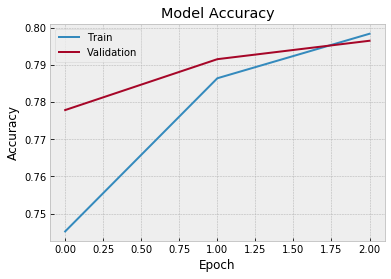

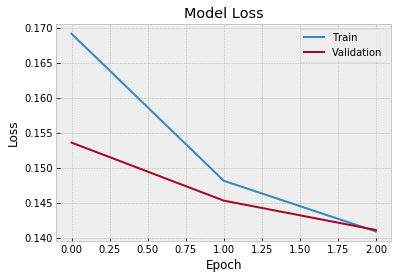

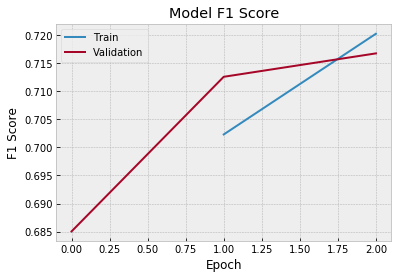

In [33]:
# Plot accuracy
plt.plot(malstm_trained1.history['acc'])
plt.plot(malstm_trained1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained1.history['loss'])
plt.plot(malstm_trained1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_trained1.history['f1_score'])
plt.plot(malstm_trained1.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
loss, accuracy, f1score = malstm_trained1.model.evaluate([X_test_q1, X_test_q2], y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.1410, accuracy = 0.7955, f1-score = 0.7101


*2. Adam optimizer - loss function: MSE*

In [ ]:
# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

optimizer = Adam()

malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', f1_score])

# Start training
training_start_time = time()

malstm_trained2 = malstm.fit([X_train['left'], X_train['right']], y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], y_validation))

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

In [ ]:
# Plot accuracy
plt.plot(malstm_trained2.history['acc'])
plt.plot(malstm_trained2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained2.history['loss'])
plt.plot(malstm_trained2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_trained2.history['f1_score'])
plt.plot(malstm_trained2.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, f1score = malstm_trained2.model.evaluate([X_test_q1, X_test_q2], y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

*3. Adam as optimizer, loss function: binary cross entropy*

In [ ]:
# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

optimizer = Adam()

malstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])

# Start training
training_start_time = time()

malstm_trained3 = malstm.fit([X_train['left'], X_train['right']], y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], y_validation))

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

In [ ]:
# Plot accuracy
plt.plot(malstm_trained3.history['acc'])
plt.plot(malstm_trained3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained3.history['loss'])
plt.plot(malstm_trained3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_trained3.history['f1_score'])
plt.plot(malstm_trained3.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, f1score = malstm_trained3.model.evaluate([X_test_q1, X_test_q2], y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

#### Custom model architecture #1

In [46]:
# columns which are added as input to deep learning model

feats = ['cosine_dist', 'jaccard_dist', 'edit_dist_first_word',
         'edit_dist_last_word', 'num_common_words', 'num_common_words_ner', 'pct_common_words',
         'pct_common_words_ner', 'diff_wc', 'diff_unique_wc']

feats_value = np.array(train[feats])

In [47]:
# to split into training, validation, and test set for features
from sklearn.cross_validation import train_test_split

X_train_feats, X_test_feats, y_train_feats, y_test_feats = train_test_split(feats_value, labels, test_size=0.2, random_state=1, stratify=labels)

X_train_feats, X_val_feats, y_train_feats, y_val_feats = train_test_split(X_train_feats, y_train_feats, test_size=0.2, random_state=1, stratify=y_train_feats)

print("Training, validation and testing split was successful.")

assert X_train_feats.shape[0] == X_train['left'].shape[0]

Training, validation and testing split was successful.


In [ ]:
# build the model
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25
max_seq_length = 31


def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

encoded_left = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(left_input)

encoded_right = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

feats_input = Input(shape=(X_train_feats.shape[1],), dtype='float32')

left_combined = Concatenate()([left_output, feats_input])
right_combined = Concatenate()([right_output, feats_input]) 

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_combined, right_combined])

# Pack it all up into a model
malstm_custom = Model([left_input, right_input, feats_input], [malstm_distance])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm_custom.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', f1_score])

In [ ]:
malstm_custom.summary()

In [ ]:
# Start training
training_start_time = time()

malstm_custom_trained1 = malstm_custom.fit([X_train['left'], X_train['right'], X_train_feats], y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats], y_validation),
                                          callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

In [ ]:
# Plot accuracy
plt.plot(malstm_custom_trained1.history['acc'])
plt.plot(malstm_custom_trained1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained1.history['loss'])
plt.plot(malstm_custom_trained1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained1.history['f1_score'])
plt.plot(malstm_custom_trained1.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, f1score = malstm_custom_trained1.model.evaluate([X_test_q1, X_test_q2, X_test_feats], y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

#### Custom model architecture #2



In [41]:
# Load pos tag per question
q1_pos_tag = np.load('data/preset/q1_pos_tag.npy')
q2_pos_tag = np.load('data/preset/q2_pos_tag.npy')

In [42]:
def convert_pos_tag(pos_tag_list):
    tags = []
    for i in range(0, len(pos_tag_list)):
        tmp = []
        for key, value in pos_tag_list[i].items():
            tmp.append(value)
        tags.append(tmp)
    return np.array(tags)

In [43]:
q1_tag = convert_pos_tag(q1_pos_tag)
q2_tag = convert_pos_tag(q2_pos_tag)

In [44]:
# columns which are added as input to deep learning model

feats_ind_q1 = ['question1_wc', 'question1_unique_wc', 'question1_sc']
feats_ind_q2 = ['question2_wc', 'question2_unique_wc', 'question2_sc']
feats_shared = ['cosine_dist', 'jaccard_dist', 'edit_dist_first_word', 'edit_dist_last_word',
               'num_common_words', 'num_common_words_ner', 'pct_common_words', 'pct_common_words_ner']

feats_ind_q1 = np.array(train[feats_ind_q1])
feats_ind_q2 = np.array(train[feats_ind_q2])

feats_shared_list = {}
for col in feats_shared:
    feats_shared_list[col] = np.array(train[col])

In [48]:
# to split into training, validation, and test set for additional features
from sklearn.cross_validation import train_test_split

X_train_feats, X_test_feats, y_train_feats, y_test_feats = train_test_split(feats_value, labels, test_size=0.2, random_state=1, stratify=labels)

X_train_feats, X_val_feats, y_train_feats, y_val_feats = train_test_split(X_train_feats, y_train_feats, test_size=0.2, random_state=1, stratify=y_train_feats)

print("Training, validation and testing split was successful.")

assert X_train_feats.shape[0] == X_train['left'].shape[0]

Training, validation and testing split was successful.


In [49]:
# to split into training, validation, and test set for additional individual features
from sklearn.cross_validation import train_test_split

X_train_feats_ind_q1, X_test_feats_ind_q1, y_train_feats_ind_q1, y_test_feats_ind_q1 = train_test_split(feats_ind_q1, labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_ind_q1, X_val_feats_ind_q1, y_train_feats_ind_q1, y_val_feats_ind_q1 = train_test_split(X_train_feats_ind_q1, y_train_feats_ind_q1, test_size=0.2, random_state=1, stratify=y_train_feats_ind_q1)
assert X_train_feats_ind_q1.shape[0] == X_train['left'].shape[0]

print("ind_q1 - Training, validation and testing split was successful.")
print("---------------------------------------------------------------")

X_train_feats_ind_q2, X_test_feats_ind_q2, y_train_feats_ind_q2, y_test_feats_ind_q2 = train_test_split(feats_ind_q2, labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_ind_q2, X_val_feats_ind_q2, y_train_feats_ind_q2, y_val_feats_ind_q2 = train_test_split(X_train_feats_ind_q2, y_train_feats_ind_q2, test_size=0.2, random_state=1, stratify=y_train_feats_ind_q2)
assert X_train_feats_ind_q2.shape[0] == X_train['left'].shape[0]

print("ind_q2 - Training, validation and testing split was successful.")
print("---------------------------------------------------------------")

ind_q1 - Training, validation and testing split was successful.
---------------------------------------------------------------
ind_q2 - Training, validation and testing split was successful.
---------------------------------------------------------------


In [50]:
# to split into training, validation, and test set for additional shared features
from sklearn.cross_validation import train_test_split

print("List of shared features: ")
for key in feats_shared_list.keys():
    print(key)

print("\n---------------------------------------------------------------\n")

X_train_feats_shared_edit_dist_last_word, X_test_feats_shared_edit_dist_last_word, y_train_feats_shared_edit_dist_last_word, y_test_feats_shared_edit_dist_last_word = train_test_split(feats_shared_list['edit_dist_last_word'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_edit_dist_last_word, X_val_feats_shared_edit_dist_last_word, y_train_feats_shared_edit_dist_last_word, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_edit_dist_last_word, y_train_feats_shared_edit_dist_last_word, test_size=0.2, random_state=1, stratify=y_train_feats_shared_edit_dist_last_word)
assert X_train_feats_shared_edit_dist_last_word.shape[0] == X_train['left'].shape[0]

print("edit_dist_last_word - Training, validation and testing split was successful.")

X_train_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_first_word, y_train_feats_shared_edit_dist_first_word, y_test_feats_shared_edit_dist_first_word = train_test_split(feats_shared_list['edit_dist_first_word'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_first_word, y_train_feats_shared_edit_dist_first_word, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_edit_dist_first_word, y_train_feats_shared_edit_dist_first_word, test_size=0.2, random_state=1, stratify=y_train_feats_shared_edit_dist_first_word)
assert X_train_feats_shared_edit_dist_first_word.shape[0] == X_train['left'].shape[0]

print("edit_dist_first_word - Training, validation and testing split was successful.")

X_train_feats_shared_num_common_words_ner, X_test_feats_shared_num_common_words_ner, y_train_feats_shared_num_common_words_ner, y_test_feats_shared_num_common_words_ner = train_test_split(feats_shared_list['num_common_words_ner'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_num_common_words_ner, X_val_feats_shared_num_common_words_ner, y_train_feats_shared_num_common_words_ner, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_num_common_words_ner, y_train_feats_shared_num_common_words_ner, test_size=0.2, random_state=1, stratify=y_train_feats_shared_num_common_words_ner)
assert X_train_feats_shared_num_common_words_ner.shape[0] == X_train['left'].shape[0]

print("num_common_words_ner - Training, validation and testing split was successful.")

X_train_feats_shared_num_common_words, X_test_feats_shared_num_common_words, y_train_feats_shared_num_common_words, y_test_feats_shared_num_common_words = train_test_split(feats_shared_list['num_common_words'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_num_common_words, X_val_feats_shared_num_common_words, y_train_feats_shared_num_common_words, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_num_common_words, y_train_feats_shared_num_common_words, test_size=0.2, random_state=1, stratify=y_train_feats_shared_num_common_words)
assert X_train_feats_shared_num_common_words.shape[0] == X_train['left'].shape[0]

print("num_common_words - Training, validation and testing split was successful.")

X_train_feats_shared_cosine_dist, X_test_feats_shared_cosine_dist, y_train_feats_shared_cosine_dist, y_test_feats_shared_cosine_dist = train_test_split(feats_shared_list['cosine_dist'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_cosine_dist, X_val_feats_shared_cosine_dist, y_train_feats_shared_cosine_dist, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_cosine_dist, y_train_feats_shared_cosine_dist, test_size=0.2, random_state=1, stratify=y_train_feats_shared_cosine_dist)
assert X_train_feats_shared_cosine_dist.shape[0] == X_train['left'].shape[0]

print("cosine_dist - Training, validation and testing split was successful.")

X_train_feats_shared_jaccard_dist, X_test_feats_shared_jaccard_dist, y_train_feats_shared_jaccard_dist, y_test_feats_shared_jaccard_dist = train_test_split(feats_shared_list['jaccard_dist'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_jaccard_dist, X_val_feats_shared_jaccard_dist, y_train_feats_shared_jaccard_dist, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_jaccard_dist, y_train_feats_shared_jaccard_dist, test_size=0.2, random_state=1, stratify=y_train_feats_shared_jaccard_dist)
assert X_train_feats_shared_jaccard_dist.shape[0] == X_train['left'].shape[0]

print("jaccard_dist - Training, validation and testing split was successful.")

X_train_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words, y_train_feats_shared_pct_common_words, y_test_feats_shared_pct_common_words = train_test_split(feats_shared_list['pct_common_words'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words, y_train_feats_shared_pct_common_words, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_pct_common_words, y_train_feats_shared_pct_common_words, test_size=0.2, random_state=1, stratify=y_train_feats_shared_pct_common_words)
assert X_train_feats_shared_pct_common_words.shape[0] == X_train['left'].shape[0]

print("pct_common_words - Training, validation and testing split was successful.")

X_train_feats_shared_pct_common_words_ner, X_test_feats_shared_pct_common_words_ner, y_train_feats_shared_pct_common_words_ner, y_test_feats_shared_pct_common_words_ner = train_test_split(feats_shared_list['pct_common_words_ner'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_pct_common_words_ner, X_val_feats_shared_pct_common_words_ner, y_train_feats_shared_pct_common_words_ner, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_pct_common_words_ner, y_train_feats_shared_pct_common_words_ner, test_size=0.2, random_state=1, stratify=y_train_feats_shared_pct_common_words_ner)
assert X_train_feats_shared_pct_common_words_ner.shape[0] == X_train['left'].shape[0]

print("pct_common_words_ner - Training, validation and testing split was successful.")

List of shared features: 
edit_dist_last_word
num_common_words
pct_common_words
cosine_dist
num_common_words_ner
jaccard_dist
pct_common_words_ner
edit_dist_first_word

---------------------------------------------------------------

edit_dist_last_word - Training, validation and testing split was successful.
edit_dist_first_word - Training, validation and testing split was successful.
num_common_words_ner - Training, validation and testing split was successful.
num_common_words - Training, validation and testing split was successful.
cosine_dist - Training, validation and testing split was successful.
jaccard_dist - Training, validation and testing split was successful.
pct_common_words - Training, validation and testing split was successful.
pct_common_words_ner - Training, validation and testing split was successful.


*1. Adadelta optimizer - loss function: binary cross entropy*

In [51]:
# build the model
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25
max_seq_length = 31


def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

# Embedded version of the inputs

encoded_left = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(left_input)

encoded_right = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

feats_left = Input(shape=(X_train_feats_ind_q1.shape[1],), dtype='float32')
feats_right = Input(shape=(X_train_feats_ind_q2.shape[1],), dtype='float32')

left_combined = Concatenate()([left_output, feats_left])
right_combined = Concatenate()([right_output, feats_right]) 

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_combined, right_combined])

# combine malstm_distance output to shared features
feats_shared_edit_dist_first_word = Input(shape=(1,), dtype='float32')
feats_shared_edit_dist_last_word = Input(shape=(1,), dtype='float32')
feats_shared_num_common_words = Input(shape=(1,), dtype='float32')
feats_shared_num_common_words_ner = Input(shape=(1,), dtype='float32')
feats_shared_pct_common_words = Input(shape=(1,), dtype='float32')
feats_shared_pct_common_words_ner = Input(shape=(1,), dtype='float32')
feats_shared_cosine_dist = Input(shape=(1,), dtype='float32')
feats_shared_jaccard_dist = Input(shape=(1,), dtype='float32')

cc1 = Concatenate()([malstm_distance, feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                    feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                    feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                    feats_shared_cosine_dist, feats_shared_jaccard_dist]) # Merge data must same row column

out_ = Dense(1, activation='sigmoid')(cc1)


# Pack it all up into a model
malstm_custom2 = Model([left_input, right_input, feats_left, feats_right,
                       feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                        feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                        feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                        feats_shared_cosine_dist, feats_shared_jaccard_dist], [out_])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm_custom2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:46: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [ ]:
malstm_custom2.summary()

In [ ]:
# Start training
training_start_time = time()

malstm_custom_trained2 = malstm_custom2.fit([X_train['left'], X_train['right'], X_train_feats_ind_q1, X_train_feats_ind_q2,
                                            X_train_feats_shared_edit_dist_first_word, X_train_feats_shared_edit_dist_last_word,
                                            X_train_feats_shared_num_common_words, X_train_feats_shared_num_common_words_ner,
                                            X_train_feats_shared_pct_common_words, X_train_feats_shared_pct_common_words_ner,
                                            X_train_feats_shared_cosine_dist, X_train_feats_shared_jaccard_dist], 
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=n_epoch,
                                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats_ind_q1, X_val_feats_ind_q2,
                                                             X_val_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_last_word,
                                                             X_val_feats_shared_num_common_words, X_val_feats_shared_num_common_words_ner,
                                                             X_val_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words_ner,
                                                             X_val_feats_shared_cosine_dist, X_val_feats_shared_jaccard_dist], 
                                                             y_validation),
                                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

In [ ]:
# Plot accuracy
plt.plot(malstm_custom_trained2.history['acc'])
plt.plot(malstm_custom_trained2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained2.history['loss'])
plt.plot(malstm_custom_trained2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained2.history['f1_score'])
plt.plot(malstm_custom_trained2.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, f1score = malstm_custom_trained2.model.evaluate([X_test['left'], X_test['right'], X_test_feats_ind_q1, X_test_feats_ind_q2,
                                                                  X_test_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_last_word,
                                                                  X_test_feats_shared_num_common_words, X_test_feats_shared_num_common_words_ner,
                                                                  X_test_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words_ner,
                                                                  X_test_feats_shared_cosine_dist, X_test_feats_shared_jaccard_dist],
                                                                 y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

*2. Adam optimizer - loss function: binary cross entropy*

In [ ]:
# Pack it all up into a model
malstm_custom3 = Model([left_input, right_input, feats_left, feats_right,
                       feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                        feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                        feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                        feats_shared_cosine_dist, feats_shared_jaccard_dist], [out_])

optimizer = Adam()

malstm_custom3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])

In [ ]:
# Start training
training_start_time = time()

malstm_custom_trained3 = malstm_custom3.fit([X_train['left'], X_train['right'], X_train_feats_ind_q1, X_train_feats_ind_q2,
                                            X_train_feats_shared_edit_dist_first_word, X_train_feats_shared_edit_dist_last_word,
                                            X_train_feats_shared_num_common_words, X_train_feats_shared_num_common_words_ner,
                                            X_train_feats_shared_pct_common_words, X_train_feats_shared_pct_common_words_ner,
                                            X_train_feats_shared_cosine_dist, X_train_feats_shared_jaccard_dist], 
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=n_epoch,
                                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats_ind_q1, X_val_feats_ind_q2,
                                                             X_val_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_last_word,
                                                             X_val_feats_shared_num_common_words, X_val_feats_shared_num_common_words_ner,
                                                             X_val_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words_ner,
                                                             X_val_feats_shared_cosine_dist, X_val_feats_shared_jaccard_dist], 
                                                             y_validation),
                                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

In [ ]:
# Plot accuracy
plt.plot(malstm_custom_trained3.history['acc'])
plt.plot(malstm_custom_trained3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained3.history['loss'])
plt.plot(malstm_custom_trained3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained3.history['f1_score'])
plt.plot(malstm_custom_trained3.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, f1score = malstm_custom_trained3.model.evaluate([X_test['left'], X_test['right'], X_test_feats_ind_q1, X_test_feats_ind_q2,
                                                                  X_test_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_last_word,
                                                                  X_test_feats_shared_num_common_words, X_test_feats_shared_num_common_words_ner,
                                                                  X_test_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words_ner,
                                                                  X_test_feats_shared_cosine_dist, X_test_feats_shared_jaccard_dist],
                                                                 y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

*3. Adam optimizer - sigmoid on dense layer - loss function: mse*

In [52]:
# Pack it all up into a model
malstm_custom4 = Model([left_input, right_input, feats_left, feats_right,
                       feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                        feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                        feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                        feats_shared_cosine_dist, feats_shared_jaccard_dist], [out_])

optimizer = Adam()

malstm_custom4.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', f1_score])

In [53]:
# Start training
training_start_time = time()

malstm_custom_trained4 = malstm_custom4.fit([X_train['left'], X_train['right'], X_train_feats_ind_q1, X_train_feats_ind_q2,
                                            X_train_feats_shared_edit_dist_first_word, X_train_feats_shared_edit_dist_last_word,
                                            X_train_feats_shared_num_common_words, X_train_feats_shared_num_common_words_ner,
                                            X_train_feats_shared_pct_common_words, X_train_feats_shared_pct_common_words_ner,
                                            X_train_feats_shared_cosine_dist, X_train_feats_shared_jaccard_dist], 
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=n_epoch,
                                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats_ind_q1, X_val_feats_ind_q2,
                                                             X_val_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_last_word,
                                                             X_val_feats_shared_num_common_words, X_val_feats_shared_num_common_words_ner,
                                                             X_val_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words_ner,
                                                             X_val_feats_shared_cosine_dist, X_val_feats_shared_jaccard_dist], 
                                                             y_validation),
                                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 258745 samples, validate on 64687 samples
Epoch 1/25
258745/258745 [==============================] - 203s 786us/step - loss: 0.3775 - acc: 0.6211 - f1_score: nan - val_loss: 0.3692 - val_acc: 0.6308 - val_f1_score: nan
Epoch 2/25
258745/258745 [==============================] - 205s 793us/step - loss: 0.3691 - acc: 0.6308 - f1_score: nan - val_loss: 0.3691 - val_acc: 0.6308 - val_f1_score: nan
Epoch 3/25
258745/258745 [==============================] - 207s 801us/step - loss: 0.3691 - acc: 0.6308 - f1_score: nan - val_loss: 0.3691 - val_acc: 0.6308 - val_f1_score: nan
Epoch 4/25
258745/258745 [==============================] - 212s 820us/step - loss: 0.2954 - acc: 0.6553 - f1_score: nan - val_loss: 0.1882 - val_acc: 0.6987 - val_f1_score: 0.5585
Epoch 5/25
258745/258745 [==============================] - 214s 826us/step - loss: 0.1849 - acc: 0.7043 - f1_score: 0.5479 - val_loss: 0.1837 - val_acc: 0.7076 - val_f1_score: 0.5658
Epoch 6/25
258745/258745 [========================

258745/258745 [==============================] - 222s 857us/step - loss: 0.1651 - acc: 0.7440 - f1_score: 0.6293 - val_loss: 0.1779 - val_acc: 0.7278 - val_f1_score: 0.6139
Epoch 24/25
258745/258745 [==============================] - 206s 796us/step - loss: 0.1643 - acc: 0.7455 - f1_score: 0.6327 - val_loss: 0.1779 - val_acc: 0.7261 - val_f1_score: 0.5982
Epoch 25/25
258745/258745 [==============================] - 205s 791us/step - loss: 0.1639 - acc: 0.7465 - f1_score: 0.6341 - val_loss: 0.1785 - val_acc: 0.7253 - val_f1_score: 0.5892
Training time finished.
25 epochs in 1:30:06.465869


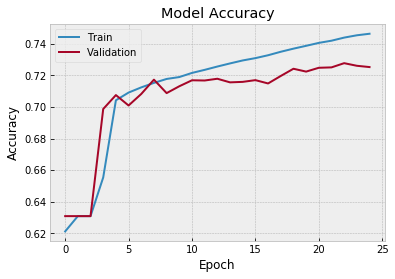

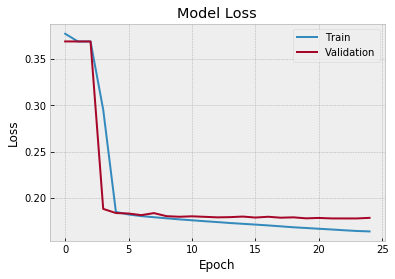

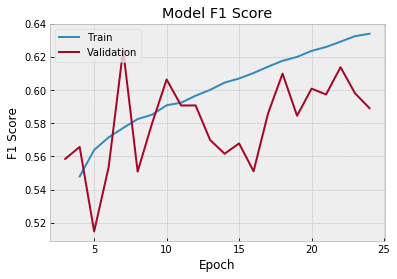

In [54]:
# Plot accuracy
plt.plot(malstm_custom_trained4.history['acc'])
plt.plot(malstm_custom_trained4.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained4.history['loss'])
plt.plot(malstm_custom_trained4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained4.history['f1_score'])
plt.plot(malstm_custom_trained4.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
loss, accuracy, f1score = malstm_custom_trained4.model.evaluate([X_test['left'], X_test['right'], X_test_feats_ind_q1, X_test_feats_ind_q2,
                                                                  X_test_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_last_word,
                                                                  X_test_feats_shared_num_common_words, X_test_feats_shared_num_common_words_ner,
                                                                  X_test_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words_ner,
                                                                  X_test_feats_shared_cosine_dist, X_test_feats_shared_jaccard_dist],
                                                                 y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.1780, accuracy = 0.7267, f1-score = nan


*4. Adam optimizer - relu on dense layer - mse as loss function*

In [ ]:
# build the model
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25
max_seq_length = 31


def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

# Embedded version of the inputs

encoded_left = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(left_input)

encoded_right = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

feats_left = Input(shape=(X_train_feats_ind_q1.shape[1],), dtype='float32')
feats_right = Input(shape=(X_train_feats_ind_q2.shape[1],), dtype='float32')

left_combined = Concatenate()([left_output, feats_left])
right_combined = Concatenate()([right_output, feats_right]) 

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_combined, right_combined])

# combine malstm_distance output to shared features
feats_shared_edit_dist_first_word = Input(shape=(1,), dtype='float32')
feats_shared_edit_dist_last_word = Input(shape=(1,), dtype='float32')
feats_shared_num_common_words = Input(shape=(1,), dtype='float32')
feats_shared_num_common_words_ner = Input(shape=(1,), dtype='float32')
feats_shared_pct_common_words = Input(shape=(1,), dtype='float32')
feats_shared_pct_common_words_ner = Input(shape=(1,), dtype='float32')
feats_shared_cosine_dist = Input(shape=(1,), dtype='float32')
feats_shared_jaccard_dist = Input(shape=(1,), dtype='float32')

cc1 = Concatenate()([malstm_distance, feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                    feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                    feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                    feats_shared_cosine_dist, feats_shared_jaccard_dist]) # Merge data must same row column

out_ = Dense(1, activation='relu')(cc1)


# Pack it all up into a model
malstm_custom5 = Model([left_input, right_input, feats_left, feats_right,
                       feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                        feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                        feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                        feats_shared_cosine_dist, feats_shared_jaccard_dist], [out_])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm_custom5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])

In [ ]:
# Start training
training_start_time = time()

malstm_custom_trained5 = malstm_custom5.fit([X_train['left'], X_train['right'], X_train_feats_ind_q1, X_train_feats_ind_q2,
                                            X_train_feats_shared_edit_dist_first_word, X_train_feats_shared_edit_dist_last_word,
                                            X_train_feats_shared_num_common_words, X_train_feats_shared_num_common_words_ner,
                                            X_train_feats_shared_pct_common_words, X_train_feats_shared_pct_common_words_ner,
                                            X_train_feats_shared_cosine_dist, X_train_feats_shared_jaccard_dist], 
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=n_epoch,
                                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats_ind_q1, X_val_feats_ind_q2,
                                                             X_val_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_last_word,
                                                             X_val_feats_shared_num_common_words, X_val_feats_shared_num_common_words_ner,
                                                             X_val_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words_ner,
                                                             X_val_feats_shared_cosine_dist, X_val_feats_shared_jaccard_dist], 
                                                             y_validation),
                                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

In [ ]:
# Plot accuracy
plt.plot(malstm_custom_trained5.history['acc'])
plt.plot(malstm_custom_trained5.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained5.history['loss'])
plt.plot(malstm_custom_trained5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained5.history['f1_score'])
plt.plot(malstm_custom_trained5.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, f1score = malstm_custom_trained5.model.evaluate([X_test['left'], X_test['right'], X_test_feats_ind_q1, X_test_feats_ind_q2,
                                                                  X_test_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_last_word,
                                                                  X_test_feats_shared_num_common_words, X_test_feats_shared_num_common_words_ner,
                                                                  X_test_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words_ner,
                                                                  X_test_feats_shared_cosine_dist, X_test_feats_shared_jaccard_dist],
                                                                 y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))